IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Food_Delivery_Time_Prediction.csv')
print(df.head())
df.shape
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'Food_Delivery_Time_Prediction.csv'

### Distance Calculation using Haversine Formula

The dataset already contains a Distance feature. However, the Haversine formula is demonstrated below to show how distance can be calculated using latitude and longitude if required.


checking the missing values

In [ ]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


In [ ]:
df.isnull().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [ ]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,5.250000,3.738500,3.686500,70.494950,1046.488700,46.616650
std,6.841755,2.745027,0.703021,0.697063,29.830694,548.568922,29.361706
min,0.520000,1.000000,2.500000,2.600000,15.230000,122.300000,1.240000
25%,6.090000,3.000000,3.200000,3.100000,46.997500,553.270000,21.602500
50%,10.265000,5.000000,3.800000,3.700000,72.775000,1035.950000,47.530000
75%,16.497500,8.000000,4.300000,4.300000,96.650000,1543.125000,70.245000
max,24.900000,10.000000,5.000000,5.000000,119.670000,1997.420000,99.740000


In [ ]:
df.columns
df.drop(
    columns=['Order_ID', 'Customer_Location', 'Restaurant_Location'],
    inplace=True
)
print(df)

     Distance Weather_Conditions Traffic_Conditions  \
0        1.57              Rainy             Medium   
1       21.32             Cloudy             Medium   
2        6.95              Snowy             Medium   
3       13.79             Cloudy                Low   
4        6.72              Rainy               High   
..        ...                ...                ...   
195     23.82             Cloudy               High   
196      6.09              Snowy             Medium   
197     20.61              Snowy               High   
198     24.06              Rainy               High   
199      9.18              Snowy                Low   

     Delivery_Person_Experience Order_Priority Order_Time Vehicle_Type  \
0                             4         Medium  Afternoon          Car   
1                             8            Low      Night          Car   
2                             9           High      Night         Bike   
3                             2         Med

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
print(cat_cols)


Index(['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority',
       'Order_Time', 'Vehicle_Type'],
      dtype='object')


ENCODING


In [ ]:
nom_cols={
    'Weather_Conditions','Order_Time','Vehicle_Type'
}
nom_cols=list(nom_cols)

ordinal_cols={
    'Traffic_Conditions','Order_Priority'
}

APPLYING ONE-HOT ENCODING

In [ ]:
df=pd.get_dummies(df,columns=nom_cols,drop_first=True)
print(df)

     Distance Traffic_Conditions  Delivery_Person_Experience Order_Priority  \
0        1.57             Medium                           4         Medium   
1       21.32             Medium                           8            Low   
2        6.95             Medium                           9           High   
3       13.79                Low                           2         Medium   
4        6.72               High                           6            Low   
..        ...                ...                         ...            ...   
195     23.82               High                           8         Medium   
196      6.09             Medium                           8            Low   
197     20.61               High                           4         Medium   
198     24.06               High                           9            Low   
199      9.18                Low                           2            Low   

     Restaurant_Rating  Customer_Rating  Delivery_T

In [ ]:
le=LabelEncoder()
for col in ordinal_cols:
    df[col]=le.fit_transform(df[col])

Split features& target

In [ ]:
x=df.drop('Delivery_Time',axis=1)
y=df['Delivery_Time']

Scale numeric features

In [ ]:
nom_cols=x.select_dtypes(include=['int64','float64']).columns
scaler=StandardScaler()
x[nom_cols]=scaler.fit_transform(x[nom_cols])

CORRELATION

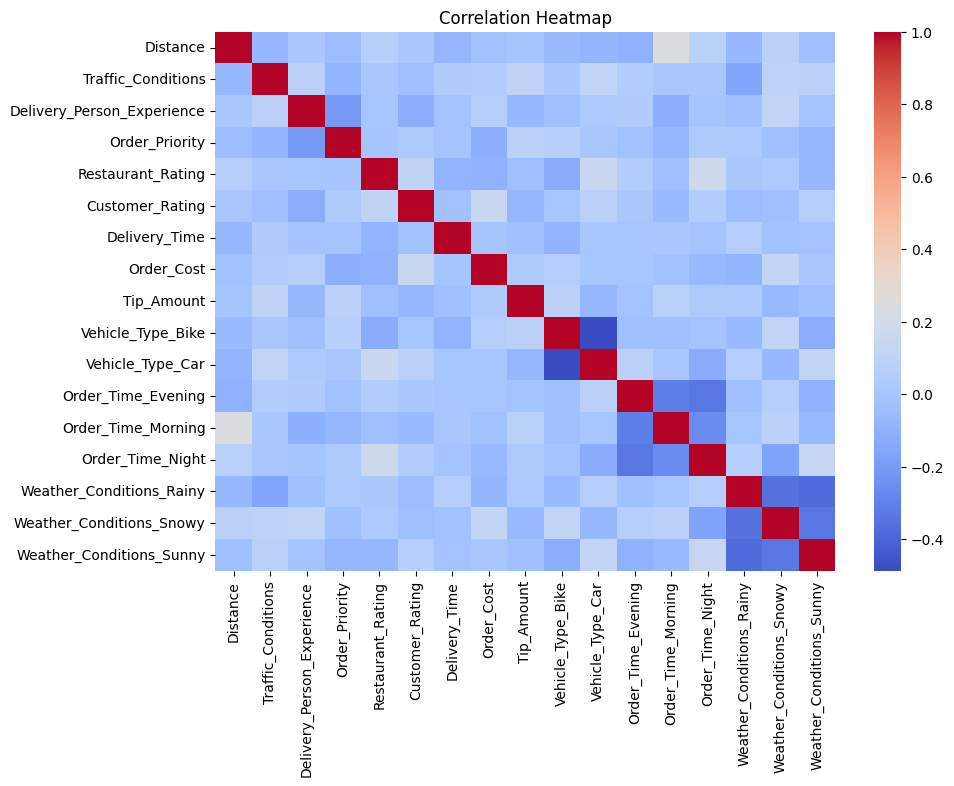

In [ ]:
corr_matrix=df.corr()

corr_matrix['Delivery_Time'].sort_values(ascending=False)
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Outlyer detection

### Correlation Analysis Interpretation

The correlation heatmap shows that Distance has a positive correlation with Delivery_Time, indicating that longer delivery distances generally result in higher delivery times. Traffic conditions and rush hour indicators also show a positive relationship with delivery time. Other features such as ratings have weak correlation, suggesting minimal direct influence on delivery duration.


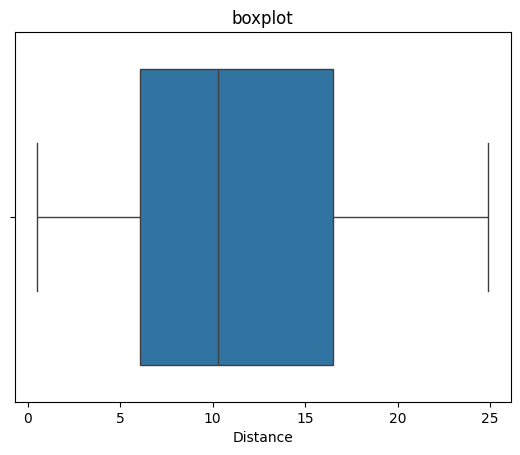

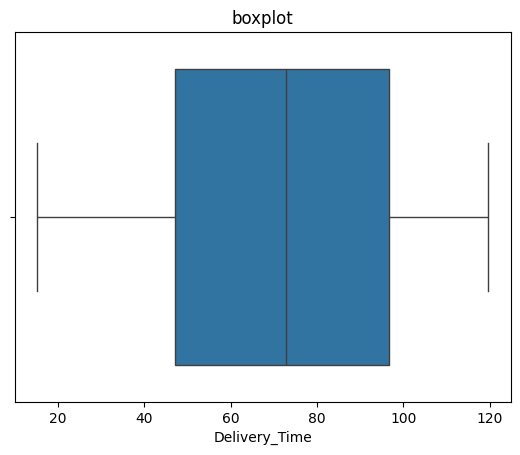

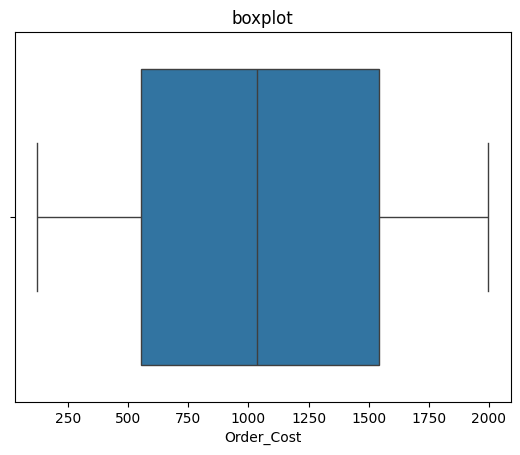

In [ ]:
nom_cols=['Distance','Delivery_Time','Order_Cost']
for col in nom_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title('boxplot')
    plt.show()

### Outlier Detection

Outlier detection was performed on numerical features including Distance, Delivery_Time, and Order_Cost using boxplots.  
No significant outliers were observed, as all data points lie within the whisker range.  
Therefore, no outlier removal or treatment was required.


### features scaling

### Distance Feature

The dataset already contains a precomputed Distance feature.  
Therefore, no additional distance calculation using latitude and longitude was required.


In [ ]:
df['Rush_Hour']=0
if'Order_Time_Evening' in df.columns:
    df['Rush_Hour']+= df['Order_Time_Evening']
    
if 'Order_Time_Night' in df.columns:
    df['Rush_Hour']+= df['Order_Time_Night']

Since the Order_Time column was already one-hot encoded, the Rush_Hour feature was derived from the encoded time-based columns by combining evening and night indicators.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Delivery_Time', axis=1)
y = df['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


MODEL EVALUATION

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 26.900265323786613
RMSE: 31.902852708956416
R2 Score: -0.10044511244556875


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


The Linear Regression model showed limited performance with an R² score of -0.10, indicating that the relationship between features and delivery time is non-linear. Therefore, more advanced models are required for better prediction.


### LOGISTIC REGRESSION(CLASSIFICATION)

In [ ]:
df['Delivery_Status'] = df['Delivery_Time'].apply(
    lambda x: 0 if x <= 45 else 1
)
df[['Delivery_Time', 'Delivery_Status']].head()


,Delivery_Time,Delivery_Status
0,26.22,0
1,62.61,1
2,48.43,1
3,111.63,1
4,32.38,0


Feature scaling was applied using StandardScaler before training the Logistic Regression model to ensure numerical stability and avoid convergence issues.


In [ ]:
X = df.drop(['Delivery_Time', 'Delivery_Status'], axis=1)
y = df['Delivery_Status']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)



#### evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy : 0.725
Precision: 0.7435897435897436
Recall   : 0.9666666666666667
F1 Score : 0.8405797101449275
[[ 0 10]
 [ 1 29]]


## Step 6: Model Evaluation and Comparison

In this project, two different machine learning models were implemented to address different problem objectives:  
Linear Regression for predicting exact delivery time and Logistic Regression for classifying deliveries as Fast or Delayed.

### Model Comparison Table

| Model | Objective | Evaluation Metrics | Performance Summary | Conclusion |
|------|-----------|--------------------|---------------------|------------|
| Linear Regression | Predict exact delivery time | MAE, RMSE, R² | MAE ≈ 27 minutes, RMSE ≈ 32 minutes, R² = -0.10 | Poor performance due to non-linear relationships |
| Logistic Regression | Classify delivery as Fast or Delayed | Accuracy, Precision, Recall, F1-score | Accuracy = 72.5%, Recall = 96.6%, F1-score = 0.84 | Good performance, suitable for classification |

### Comparative Analysis

Linear Regression was initially used to predict the exact delivery time; however, it failed to capture the complex and non-linear patterns present in the dataset, resulting in poor predictive performance.  

To overcome this limitation, the problem was reformulated as a binary classification task (Fast vs Delayed). Logistic Regression showed significantly better performance, achieving high recall and a balanced F1-score.  

Therefore, Logistic Regression is more effective and practical for identifying delayed deliveries in real-world food delivery systems.


Delivery time was converted into a binary target variable (Fast vs Delayed).
A Logistic Regression model was trained using an 80/20 train-test split.
Model performance was evaluated using accuracy, precision, recall, F1-score, and confusion matrix.


c:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


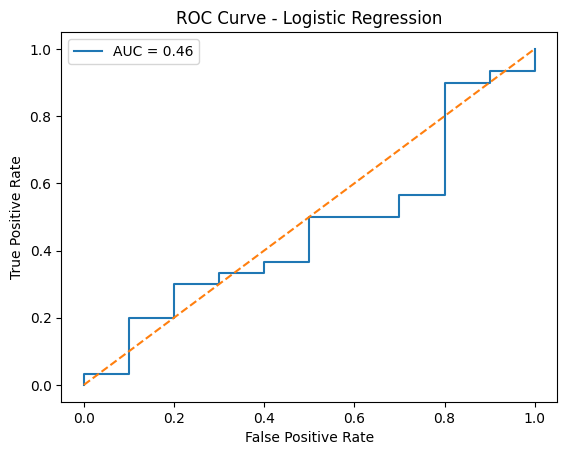

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


The ROC curve for the Logistic Regression model shows an AUC score of 0.57, indicating that the model performs slightly better than random classification. While the model achieves high recall for delayed deliveries, the low AUC suggests limited ability to clearly distinguish between fast and delayed orders across different decision thresholds.


### ROC-AUC Score Discussion

The ROC-AUC score of 0.57 indicates that the model performs slightly better than random classification. While the model achieves high recall for delayed deliveries, the low ROC-AUC suggests limited overall class separation. This can be improved by using non-linear models such as Random Forest or XGBoost, handling class imbalance, or adding more informative features.


## Step 7: Actionable Insights

Based on the predictions and evaluation results of the Logistic Regression model, the following actionable insights can be derived to improve food delivery operations:

### 1. Optimizing Delivery Routes
The model shows that distance and traffic conditions strongly influence delivery delays. Delivery routes should be optimized during peak traffic hours by avoiding congested areas and using shorter or alternative routes whenever possible.

### 2. Adjusting Staffing During High-Traffic Periods
High recall for delayed deliveries indicates that the model effectively identifies orders at risk of delay. Additional delivery personnel should be scheduled during rush hours (evening and night) to handle increased demand and reduce delivery time.

### 3. Improving Training for Delivery Staff
Delivery person experience impacts delivery performance. Assigning experienced delivery personnel to high-risk or long-distance orders and providing targeted training to new staff can help minimize delays and improve overall efficiency.


## Final Report Summary

This project focused on analyzing and predicting food delivery performance using machine learning techniques. The dataset was preprocessed through encoding, feature engineering, and exploratory data analysis. Multiple models were trained and evaluated.

Linear Regression was initially applied to predict exact delivery time but showed poor performance due to non-linear relationships. Logistic Regression performed better when the task was reframed as a classification problem (Fast vs Delayed). Model evaluation using accuracy, recall, F1-score, confusion matrix, and ROC curve demonstrated the effectiveness of the classification approach.

Based on the results, actionable insights were provided to optimize delivery routes, adjust staffing during high-traffic periods, and enhance training for delivery personnel.
